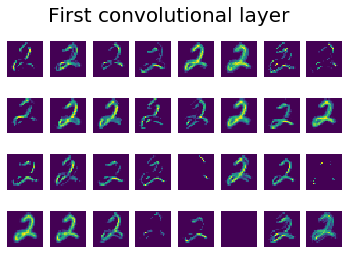

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

if __name__=='__main__':
    mnist = tf.keras.datasets.mnist
    (x_train, y_train),(x_test, y_test) = mnist.load_data()

    x_train = x_train[..., tf.newaxis]
    x_test = x_test[..., tf.newaxis]
    x_train, x_test = x_train / 255.0, x_test / 255.0


    model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1), activation ='relu'),
        tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation ='relu', padding = 'same'),
        tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation ='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation ='relu', padding='same'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

    model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    layer_outputs = [layer.output for layer in model.layers[:8]]
    activation_model = tf.keras.Model(inputs = model.input, outputs = layer_outputs)

    test_im = x_train[2979] # Random number
    activations = activation_model.predict(test_im.reshape(1,28,28,1))

    first_layer_activation = activations[0]

    # DRAW PLOTS
    fig, axs = plt.subplots(4, 8)
    fig.suptitle('First convolutional layer', fontsize=20)
    [axi.set_axis_off() for axi in axs.ravel()]

    for i in range(first_layer_activation.shape[3]):
        axs[i//8,i%8].imshow(first_layer_activation[0,:,:,i])
    plt.show()